In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.applications.resnet50 import preprocess_input

2025-11-02 09:17:25.877871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762075046.103431      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762075046.167243      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.1,
    rotation_range = 15,
    horizontal_flip = True
)

In [3]:
train = data.flow_from_directory(
    '/kaggle/input/eggs-images-classification-damaged-or-not/Eggs Classification',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training'
)

Found 636 images belonging to 2 classes.


In [4]:
test = data.flow_from_directory(
    '/kaggle/input/eggs-images-classification-damaged-or-not/Eggs Classification',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset='validation'
)

Found 158 images belonging to 2 classes.


In [5]:
model = models.Sequential(
    [
        
        layers.Conv2D(32,(3,3),activation = 'relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64,(3,3),activation = 'relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128,(3,3),activation = 'relu'),
        layers.MaxPooling2D(2,2),
        
        layers.Flatten(),

        layers.Dense(256,activation = 'relu'),

        layers.Dropout(0.5),
        layers.Dense(1,activation='sigmoid')
    ]
)

I0000 00:00:1762075061.595523      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762075061.596205      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [6]:
#compile
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [7]:
#train
training = model.fit(
    train,validation_data = test,epochs = 10 
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1762075068.404959     115 service.cc:148] XLA service 0x798fec004d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762075068.405762     115 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762075068.405780     115 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762075068.846777     115 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4531 - loss: 115.5310

I0000 00:00:1762075074.476203     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6369 - loss: 75.7447 - val_accuracy: 0.7975 - val_loss: 0.5118
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 971ms/step - accuracy: 0.8169 - loss: 0.4431 - val_accuracy: 0.7975 - val_loss: 0.4949
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 962ms/step - accuracy: 0.8120 - loss: 0.4048 - val_accuracy: 0.7975 - val_loss: 0.5871
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 968ms/step - accuracy: 0.7909 - loss: 0.4639 - val_accuracy: 0.7911 - val_loss: 0.5341
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8183 - loss: 0.4525 - val_accuracy: 0.7911 - val_loss: 0.4701
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 941ms/step - accuracy: 0.7984 - loss: 0.4231 - val_accuracy: 0.7975 - val_loss: 0.4851
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 957ms/step - accuracy: 0.7978 - loss: 0.3916 - val_accuracy: 0.7722 - val_loss: 0.4499
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 965ms/step - accuracy: 0.8302 - loss: 0.3522 - val_accuracy: 0.7911 - v

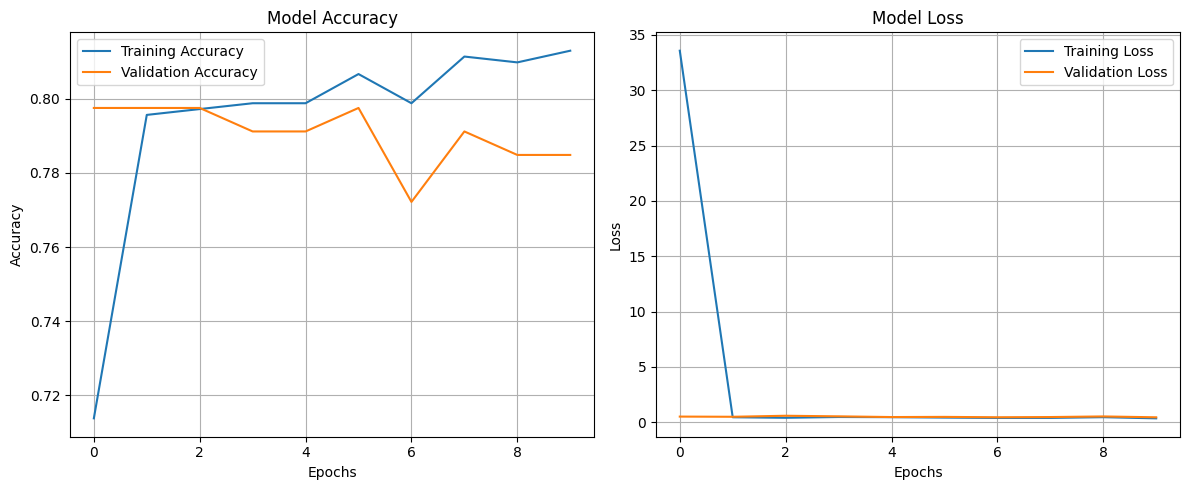

In [9]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ Accuracy và Loss
plt.figure(figsize=(12, 5))

# --- Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(training.history['accuracy'], label='Training Accuracy')
plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Loss ---
plt.subplot(1, 2, 2)
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [10]:
import os

root = '/kaggle/input/eggs-images-classification-damaged-or-not/Eggs Classification'   # chứa các folder lớp
folders = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
counts = {}
total = 0
for f in folders:
    n = len([name for name in os.listdir(os.path.join(root, f)) 
             if os.path.isfile(os.path.join(root, f, name))])
    counts[f] = n
    total += n

for k, v in counts.items():
    print(f"{k}: {v} samples, {v/total*100:.2f}%")


Damaged: 632 samples, 79.60%
Not Damaged: 162 samples, 20.40%


In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
data = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train = data.flow_from_directory(
    '/kaggle/input/eggs-images-classification-damaged-or-not/Eggs Classification',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val = data.flow_from_directory(
    '/kaggle/input/eggs-images-classification-damaged-or-not/Eggs Classification',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = True
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train,
    validation_data=val,
    epochs=10
)


Found 636 images belonging to 2 classes.
Found 158 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.6985 - loss: 1.1452 - val_accuracy: 0.7975 - val_loss: 0.9186
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7955 - loss: 0.8612 - val_accuracy: 0.7025 - val_loss: 0.8464
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7551 - loss: 0.7939 - val_accuracy: 0.7975 - val_loss: 0.7089
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8056 - loss: 0.6726 - val_accuracy: 0.7975 - val_loss: 0.7674
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8231 - loss: 0.6331 - val_accuracy: 0.8165 - val_loss: 0.6157
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8466 - loss: 0.5150 - val_accuracy: 0.7595 - val_loss: 0.6700
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8059 - loss: 0.5448 - val_accuracy: 0.8038 - v

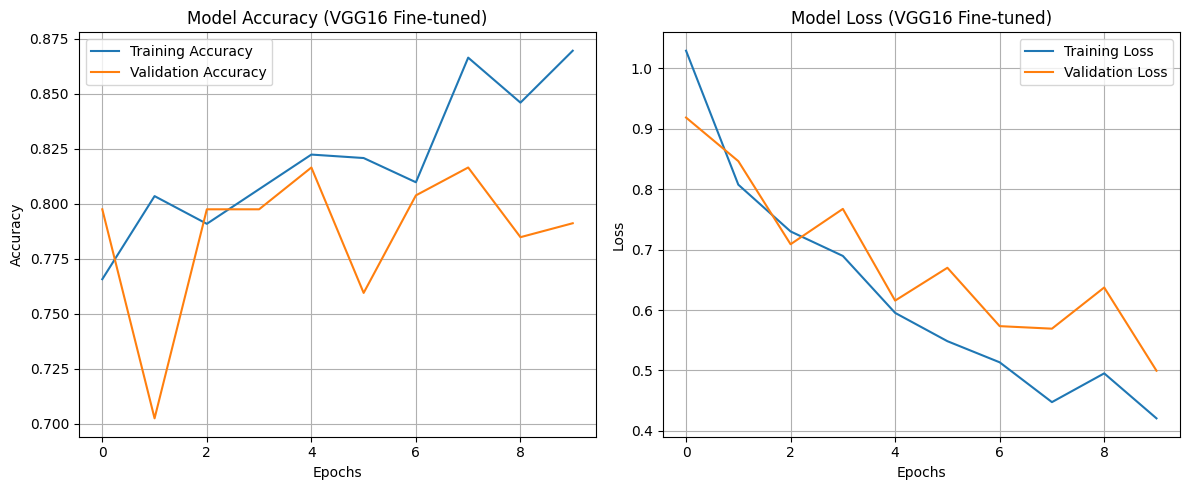

In [13]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ Accuracy và Loss
plt.figure(figsize=(12, 5))

# --- Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (VGG16 Fine-tuned)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Loss ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (VGG16 Fine-tuned)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

